# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Основные задачи:
1. Проанализировать базовые параметры недвижимости.
2. Проанализировать срок реализации недвижимости.
3. Изучить влияние базовых параметров недвижимости на конечную стоимость.
4. Сравнить стоимость м2 недвижимости в 10 локациях с наибольшим количеством предложений.
5. Изучить зависимость удаленности от центра Санкт-Петербурга на конечную стоимость.
6. Сделать общий вывод.

План работ:
1. Предобработка данных:
* Синтезировать пропущенные значения на основании исходных данных, или исключить, если это невозможно.
* Откорректировать типы данных в соответствии со значениями в каждом столбце.
* Избавиться от дубликатов.
* Избавиться от аномальных и редких значений.
2. Добавить в датафрейм столбцы с расчетными значениями для дальнейшего исследования.
3. Исследовательский анализ:
* Построить гистограммы для базовых параметров и ознакомиться с ними.
* Изучить сроки продажи недвижимости.
* Изучить влияние базовых параметров на конечную стоимость.
* Сравнить стоимость м2 в недвижимости с наибольшим количеством предложений.
* Посчитать среднюю стоимость и изучить как меняется цена по мере удаления от центра Санкт-Петербурга.
4. Сделать общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [2]:
#Открываю исходный файл данных
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [3]:
#Использую типовые методы для изучения данных в исходном файле, чтобы не загромождать код,
#некоторые вынесены в комментарий
#Общая информация о данных
#print(data.info())
#Первые строки выгруженного датафрейма
data.head(5)
#Общее количество строк и столбцов
#print(data.shape)
#Количество пропущенных значений по столбцам
#print(data.isnull().sum())
#основные описательные статистические данные
#data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Проверка проверки
data.query('total_area*0.9 <= living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,...,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,NaN,...,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,NaN,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,NaN,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,NaN,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


# Ознакомление с исходным файлом

В загруженном датасете 22 столбца и 23699 строк. При первом ознакомлении можно заметить, что данные требуют предподготовки, так как есть пропущенные и некорректные значения, так же в некоторых столбцах тип не соотвествует значениям. Следует более детально изучить проблемы и привести датасет в пригодный для аналитики вид. Так же можно выделить, что исходя из поставленных задач данные делятся на два типа: добавленные пользователем и картографические, кроме того можно выделить ключевые столбцы необходимые для исследование, работа с ними будет производиться в первую очередь, остальные столбцы можно обработать по мере необходимости уже в процессе исследования.
* общая площадь total_area
* жилая площадь living_area
* площадь кухни kitchen_area
* цена объекта last_price
* количество комнат rooms
* высота потолков ceiling_height
* этаж квартиры floor
* общее количество этажей в доме floors_total
* расстояние до центра города в метрах cityCenters_nearest
* расстояние до ближайшего аэропорта airports_nearest
* расстояние до ближайшего парка parks_nearest
* день и месяц публикации объявления first_day_exposition

##### План предобработки
1. Изучить полученные данные, ознакомиться с представленными данными, значениями, типами, построить гистограмму для всего датасета.
2. Провести работу над пропусками и некорректными значениями.
3. Провести работу над дубликатами.
4. Заполнить недостающие значения в столбцах связанными с параметрами жилья (площадь, высота потолков).
5. Провести работу над аномально низкими, высокими значенияи и прочими аномалиями.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

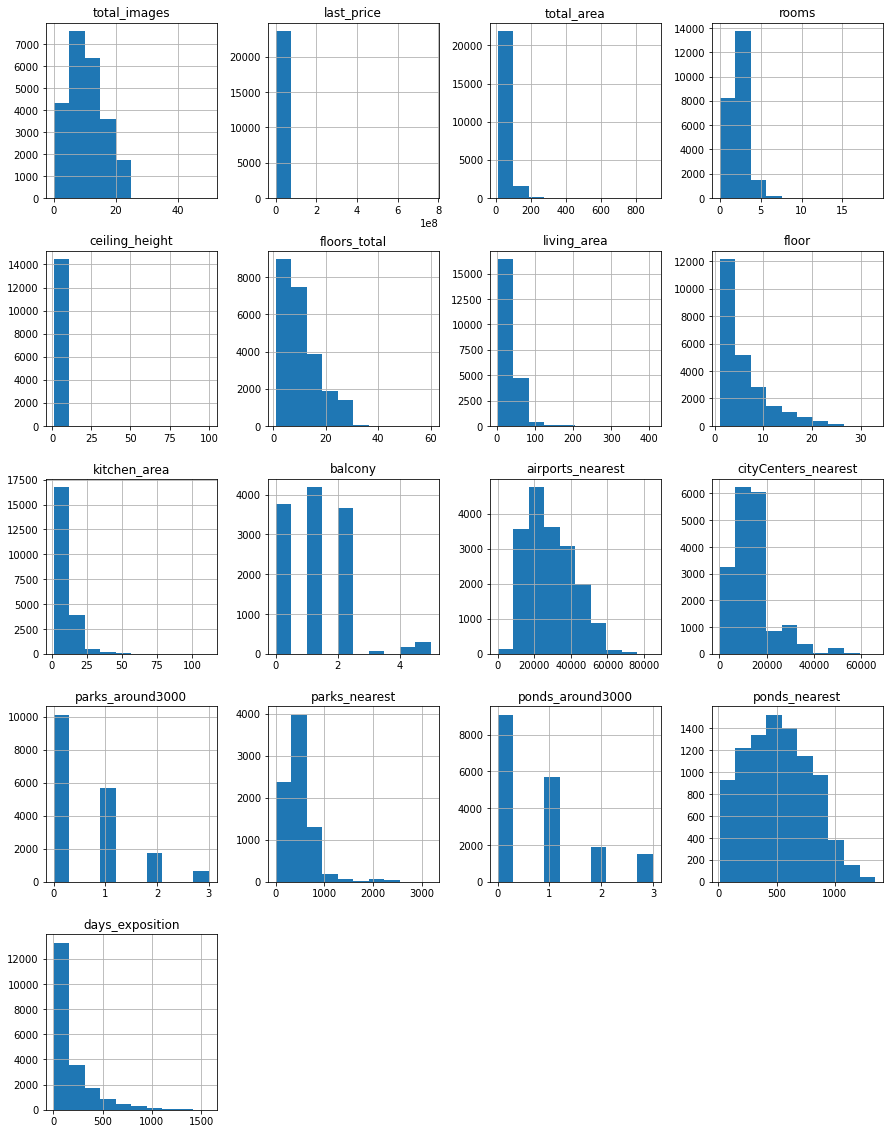

In [5]:
#Гистограмма всего датафрейма
data.hist(figsize=(15, 20))
data.info()

### Предобработка данных

#### Работа с пропусками и недостающими значениями

In [6]:
#Столбец "Цена" не предполагает использование остатка, переведем в целочисленный тип
data['last_price'] = data['last_price'].astype(int)
#Столбцы с этажностью и расположением дома имеют пропуски, их не много, рациональнее исключить их
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
#Столбец "Этажность" не предполагает использование остатка, переведем в целочисленный тип
data['floors_total'] = data['floors_total'].astype(int)
#Допустим, что пропуски в столбце "Балконы", означают отсутствие балкона. Заполним 0 и поменяем тип на целочисленный
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
#Столбцы связанные с близостью инфраструктуры и ее количеством имеют пропуски, заменим их на маркер 0
#Эти данные отсутсвуют, считаю, что нет смысла заполнять их средним, но так же нет смысла и удалять их
#Столбцы отражающие количество переведем в целочисленный, те, что отвечают за расстояние оставим Float
data[['parks_around3000','ponds_around3000']] = \
data[['parks_around3000','ponds_around3000']].fillna(value=0).astype(int)
data[['parks_nearest','ponds_nearest','airports_nearest','cityCenters_nearest']] = \
data[['parks_nearest','ponds_nearest','airports_nearest','cityCenters_nearest']].fillna(value=0)
#Допустим, что пропуски в столбце "Аппартаменты" означает, что объект не аппартаменты
#Заменим пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#Столбец дата приведем в нужный формат и обрежем время, эти значения не используются
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.normalize()
#Пропуски в столбце "Дни продажи" заменим на маркер 0, их много, чтобы исключать,
#Но и терять другие данные не стоит, так же приведем к челочисленному типу
#data['days_exposition'].fillna(0, inplace=True)
#data['days_exposition'] = data['days_exposition'].astype(int)
#Проверим соответствие типов
data.info()
#Проверим пропуски
print(data.isnull().sum())
#Посмотрим на общий вид таблицы
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


* Столбцы, где значения не подразумевают использования остатка были перведены в целочисленный тип. Цена, Количество парков и прудов, Этажность, Количество балконов, Количество дней до продажи.
* В столбцах Этажность и Расположение были выявлены пропуски, так как их немного и данные нет возможности уточнить и нет смысла заполнять их синтезированными значениями, были исключены из выборки.
* Для столбца "Балконы" логично предположить, что если не указан, значит его нет, потому пропуски были заменены на 0.
* Для столбца "Аппартаменты" логично предположить, что если не указано, значит это не аппартаменты, пропуски была заменены на False.
* Для пропусков в столбцаха близости и количество инфраструктуры по близости, пропущенные значения не имеет смысла заменять средними и нет данных, чтобы их рассчитать, значения заменены на 0, чтобы сохранить другие значения строки.
* Для пропусков в столбце "Срок продажи", пропущенные значения были заменены на 0, чтобы сохранить другие значения строк, так как нет смысла заменять их на среднее и нет исходных данных, чтобы расчитать эти значения.
* Столбец с датой публикации объявления был приведен к нужному типу и обрезан неиспользующийся фрагмент с временем, так как он не используется.


#### Работа с дубликатами

In [7]:
#Изучим уникальные значения столбца с локацией
#print(data['locality_name'].unique())
#Ничего против буквы "ё" не имею, но приведем в единый формат все названия для удобства, заменим на "е"
data['locality_name'] = data['locality_name'].str.replace('ё','е')
#Устраним дубликаты объеденив все виды поселков в единую категорию поселок
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

data['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

В столбце с названиями были выявлены дубликаты по двум причинам.
1. Нет жестких требований при указании типа населенного пункта, запись в свободной форме привела к дублированию.
2. Я не против буквы Ё, но в данном случае вариативность написания привела к дублированию.

Так же присутствуют дубликаты в названиях разных типов населенных пунктов, но выборочная проверка показала, что могут существовать населенные пункты разных типов, но с одинаковым названием. Их число не велико, оставим как есть.

В остальном столбец приведен к единому стандарту, путем объединения всех типов поселков в единую категорию "поселок" и замене буквы ё на е во всей выборке.


#### Работа с пропущенными значениями в данных параметров квартир (Площадь, Высота потолков)

In [8]:
#Отключим предупреждение о наличии пропущенных значений в обрабатываемых данных
warnings.filterwarnings('ignore')
#Заменим пропуски высоты потолков, за основу возьмем медиану с группировкой по Населенному пункту и количеству этажей
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#Заполним пропуски значений жилой и кухонной площади, средними значениями отталкиваясь от общей площади
living = data['living_area'].mean() / data['total_area'].mean()
kitchen = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living * (data['total_area'] * 0.8), inplace=True)
data['kitchen_area'].fillna(kitchen * (data['total_area']* 0.8), inplace=True)
#Обрежем остаток до 1 знака
data[['living_area', 'kitchen_area']] = round(data[['living_area', 'kitchen_area']],1)

data[['total_area','living_area', 'kitchen_area']].head(7)



,total_area,living_area,kitchen_area
0,108.0,51.0,25.0
1,40.4,18.6,11.0
2,56.0,34.3,8.3
3,159.0,72.7,22.3
4,100.0,32.0,41.0
5,30.4,14.4,9.1
6,37.3,10.6,14.4


В столбцах где сожержаться данные о параметрах жилья имеются пропуски, очевидно по причине того, что это является необязательной информацией при публикации объявлении и данных цифр просто может не оказаться под рукой. Общая площадь указана в каждой строке, без пропусков.
1. Чтобы заполнить пропуски в столбце "Высота потолков", выполненна группировка по Локации и Высоте потолков, после чего пропуски были заполнены медианным значением.
2. Чтобы заполнить пропуски в жилой и кухонной площади, были расчитаны средние значения отталкиваясь от общей площади.

#### Работа с аномалиями

##### Изучение аномальных значений

Разделим все столбцы на группы в зависимости от количественных значений.
А именно: Единицы, Десятки, Сотни и отдельно изучим столбец "Цена", так как там значения в миллионах.

(23130, 22)
[1 2 3 4 5 6]
(22872, 22)


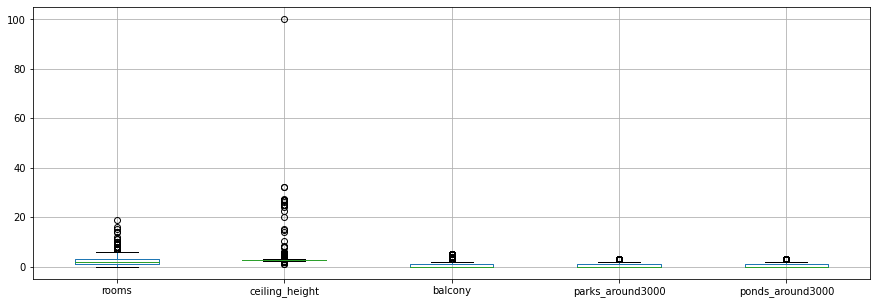

In [9]:
#Изучим столбцы с единичными или около того, значениями.
units = data[['rooms', 'ceiling_height', 'balcony', 'parks_around3000', 'ponds_around3000']]
units.boxplot(figsize=(15,5))

#Потолки выше 10 метров, выглядит нереалистично, возможно при заполнении неверно поставили запятую
#Дадим им шанс попасть в выборку, разделим на 10, слишкм низкие варианты отсетяся далее
index_ceiling = data.query('ceiling_height > 10').index 
data.loc[index_ceiling, 'ceiling_height'] = data.loc[index_ceiling, 'ceiling_height'] / 10
#Норма высоты потолка в зависимости от региона варьируется от 2,4-2,7м
#Сделаем поправку 10 см на навесной потолок и исключим все, что ниже
#Потолки выше 5 метров тоже вызывают сомнения, таких значений не много, исключим и их тоже
index_ceiling = data.query('ceiling_height < 2.3 or ceiling_height >= 3.5').index
data.drop(index_ceiling, inplace=True, axis=0)

print(data.shape)
#data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(5,40));
#Проверка
data.rooms.value_counts().to_frame()
#Корректировка
index_rooms = data.query('rooms == 0 or rooms >= 7').index
data.drop(index_rooms, inplace=True, axis=0)
print(data['rooms'].sort_values().unique())
print(data.shape)
#В остальных столбцах количество выбросов не выглядят критично, оставим как есть.

<AxesSubplot:>

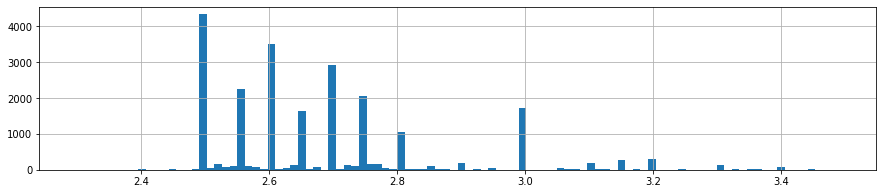

In [10]:
data.ceiling_height.hist(bins = 100, figsize = (15,3))

Произвели корректировку значения в столбце "Высота потолков". Значения выше 10м выглядят не реалистично, допустим, что в этих значениях пропущена запятая, разделим их на 10, чтобы сохранить часть данных. Остальные значения ниже 2,3м и выше 3.5м отсеем, по причине неправдоподности.

В столбце с количеством комнат, редкими значениями можно считать от 7 и более комнат. Исключим их из выборки.

В столбцах балконы и количество парков и прудов в округе, значения похожи на реалистичные, оставим как есть.


Количество ошибок: 0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 34 35 36 52 60]
       floors_total    locality_name
2253             60        Кронштадт
16731            52  Санкт-Петербург
11079            36  Санкт-Петербург
5807             36  Санкт-Петербург
2966             35  Санкт-Петербург
8496             35  Санкт-Петербург
4855             35  Санкт-Петербург
22946            35  Санкт-Петербург
18218            35  Санкт-Петербург
871              35  Санкт-Петербург
12960            35  Санкт-Петербург
9186             35  Санкт-Петербург
13975            35  Санкт-Петербург
20938            35  Санкт-Петербург
21809            35  Санкт-Петербург
5808             35  Санкт-Петербург
14347            35  Санкт-Петербург
7236             35  Санкт-Петербург
12888            35  Санкт-Петербург
9370             35  Санкт-Петербург


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

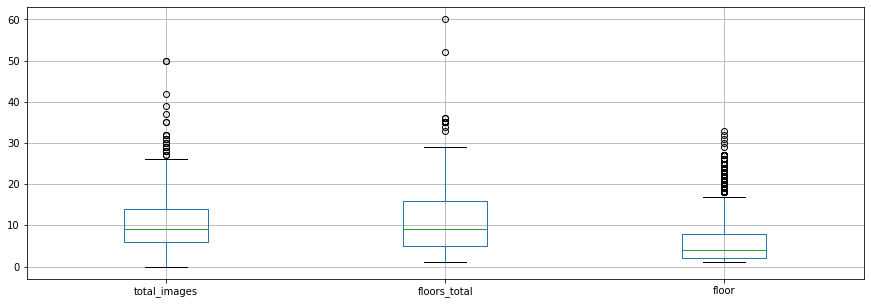

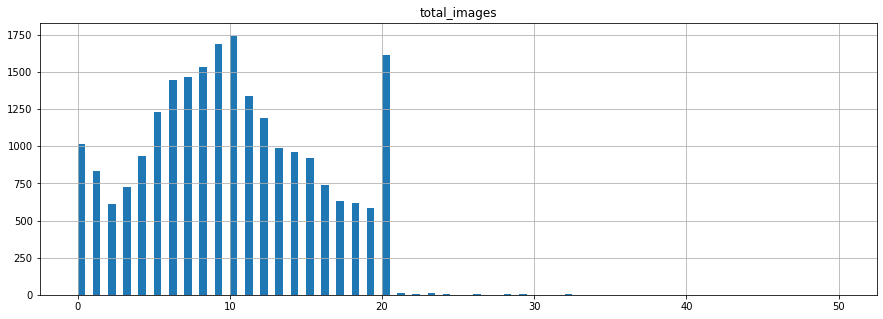

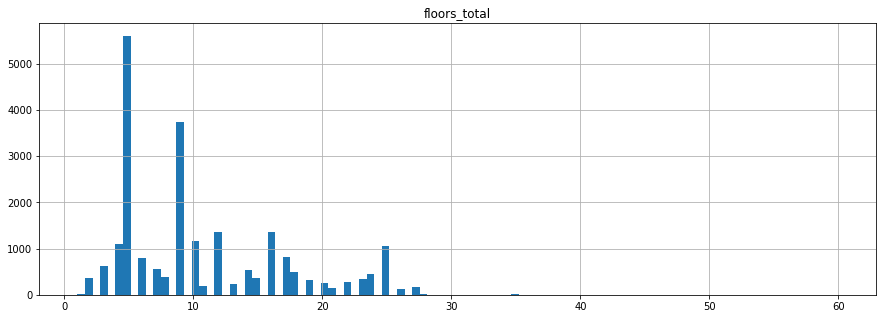

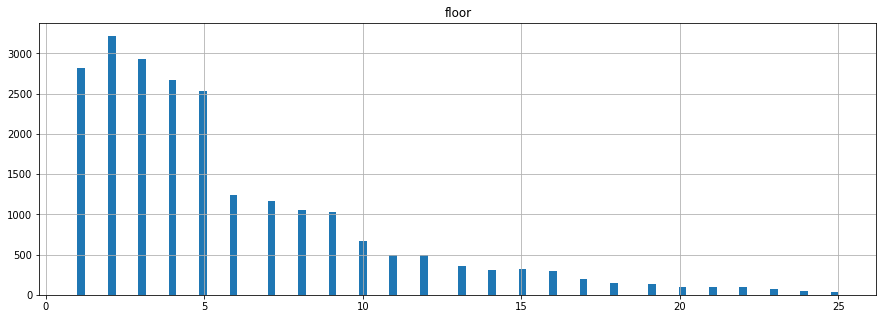

In [11]:
#Изучим столбцы, где значения исчисляются десятками
decades = data[['total_images', 'floors_total', 'floor']]
decades.boxplot(figsize=(15,5))

#Приглядимся к количеству загружаемых фото
data.sort_values('total_images').hist('total_images', bins=100, figsize=(15,5))
#Если площадка не имеет ограничений по количеству загружаемых фото, и не требует загружать хотябы одну
#То нельзя основываясь на этом столбце судить о достоверности информации, оставим как есть

#Посмотрим, что с этажами
#Проверим, есть ли зачения Этажа выше Этажности здания
print('Количество ошибок:', data.query('floor > floors_total')['floor'].count())
#Таких не нашлось, но проверить стоило
#Теперь проверим, как высоко можно забраться
print(data['floors_total'].sort_values().unique())
#60 этаж, высоковато, посмотрим где
print(data[['floors_total', 'locality_name']].sort_values(by = 'floors_total', ascending=False).head(20))
#Выводы не однозначные, очевидно, что в Кронштадте нет 60 этажного дома
#В то время как в некоторых поселкаx, вполне встречаются дома высотой 25 этажей
#В Санкт-Петербурге само собой высотки имеются, но проверить на соответствие наши данные нет возможности
#Оценим количество
data.sort_values('floors_total').hist('floors_total', bins=100, figsize=(15,5))
#Выберем золотую середину, исключим из выборки все, что выше 25 этажей
index_floor = data.query('floors_total >= 26').index
data.drop(index_floor, inplace=True, axis=0)

#С общей этажностью разобрались, посмотрим что с этажом где размещено помещение
data.sort_values('floor').hist('floor', bins=100, figsize=(15,5))
#Выброс есть, но выглядит равномерно и реалистично, оставим как есть



В данной группе данных, есть незначительные выбросы

Столбец "Количество изображений" имеет некоторый выброс, однако это не самый важный критерий, к тому же в исследовании я планирую изучить влияние количество фото на скорость продажи, потому оставил его без изменений.

Столбец "Общая этажность" имеет небольшое количество выбросов, среди которых встретились и явно указывающие на некорректность данных (Например 60 этажный дом в Крондштадте), было принято решение исключить из выборки все дома выше 25 этажей.

Столбец "Этаж помещения" имеет некоторые выбросы, однако после корректировки по столбцу "Общей этажности" они выглядят реалистично, оставим как есть.

Количество ошибок: 0


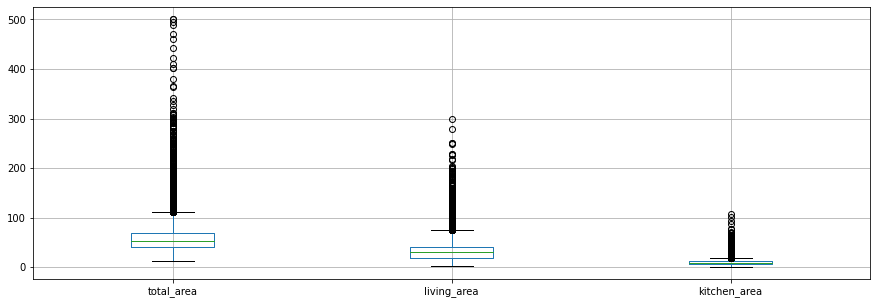

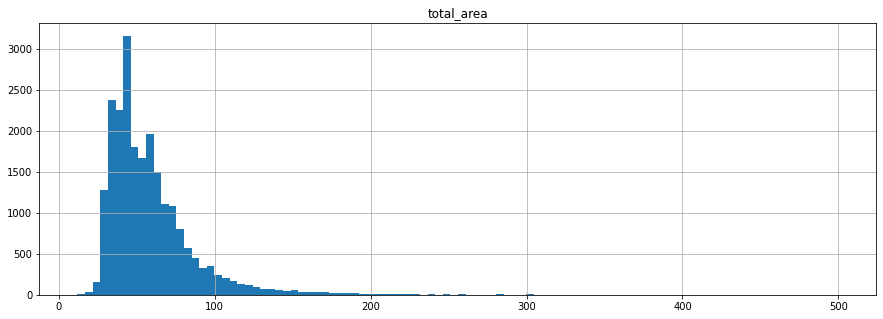

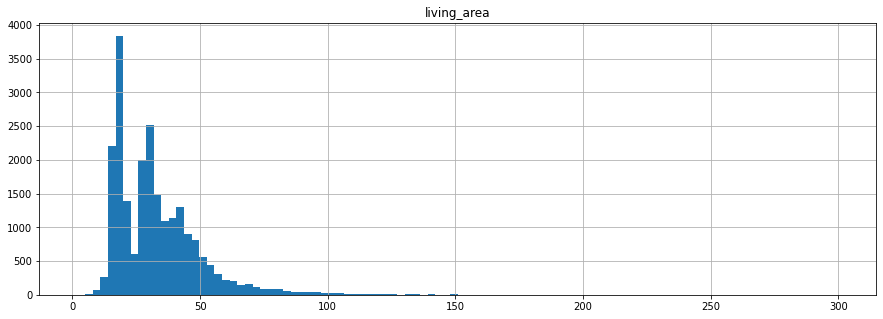

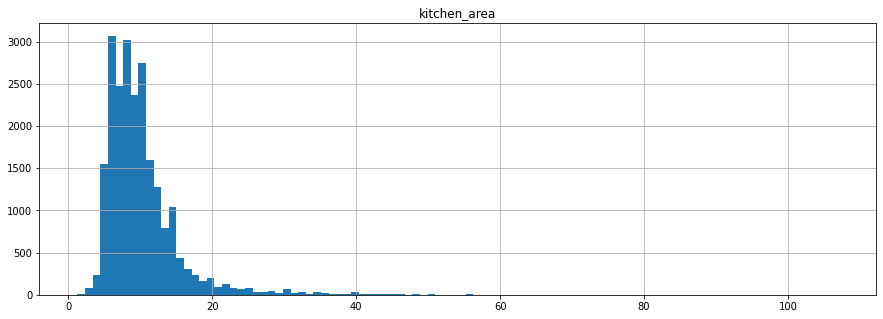

In [12]:
#Изучим стобцы значения которых исчиляются сотнями
hundred = data[['total_area', 'living_area', 'kitchen_area']]
hundred.boxplot(figsize=(15,5))
data.sort_values('total_area').hist('total_area', bins=100, figsize=(15,5))
data.sort_values('living_area').hist('living_area', bins=100, figsize=(15,5))
data.sort_values('kitchen_area').hist('kitchen_area', bins=100, figsize=(15,5))

#Значения больше 200 м2 можно считать редкими, исключаем.
index_total_area = data.query('total_area > 200 or total_area <= 20').index
data.drop(index_total_area, inplace=True, axis=0)
#Значения больше 100 м2 можно считать редкими, исключаем.
index_living_area = data.query('living_area > 100 or living_area < 10').index
data.drop(index_living_area, inplace=True, axis=0)
#Значения больше 30 м2 можно считать редкими, исключаем.
index_kitchen_area = data.query('kitchen_area > 30 or kitchen_area < 5').index
data.drop(index_kitchen_area, inplace=True, axis=0)


#Поищем явные несоответствия, жилая или кухонная площадь превышает общую
print('Количество ошибок:', data.query('living_area > total_area or kitchen_area > total_area')['living_area'].count())
#Нет таких, но проверить стоило

Значения для общей площади более 200 м2, можно считать редкими.
Значения для жилой площади более 100 м2 можно считать редкими.
Значения для площади кухни более 30 м2 можно считать редкими.
Редкие значения исключаем из выборки.

Минимальная цена: 430000 Максимальная цена: 124000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21308 entries, 0 to 21307
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21308 non-null  int64         
 1   last_price            21308 non-null  int64         
 2   total_area            21308 non-null  float64       
 3   first_day_exposition  21308 non-null  datetime64[ns]
 4   rooms                 21308 non-null  int64         
 5   ceiling_height        21308 non-null  float64       
 6   floors_total          21308 non-null  int64         
 7   living_area           21308 non-null  float64       
 8   floor                 21308 non-null  int64         
 9   is_apartment          21308 non-null  bool          
 10  studio                21308 non-null  bool          
 11  open_plan             21308 non-null  bool          
 12  kitchen_area        

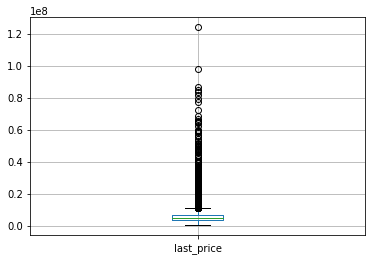

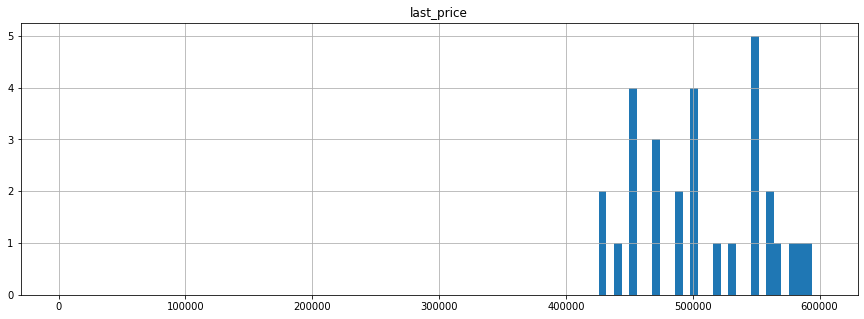

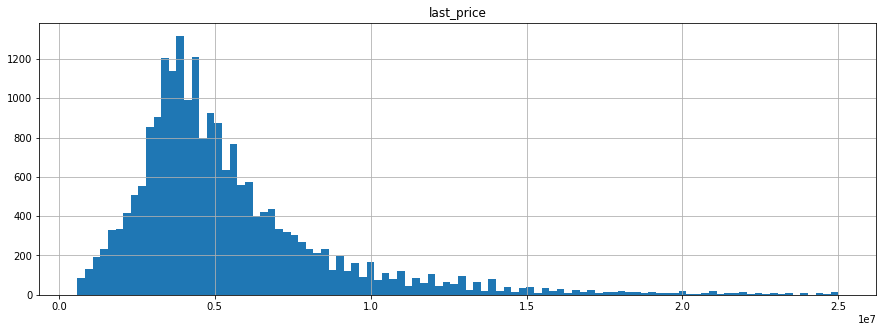

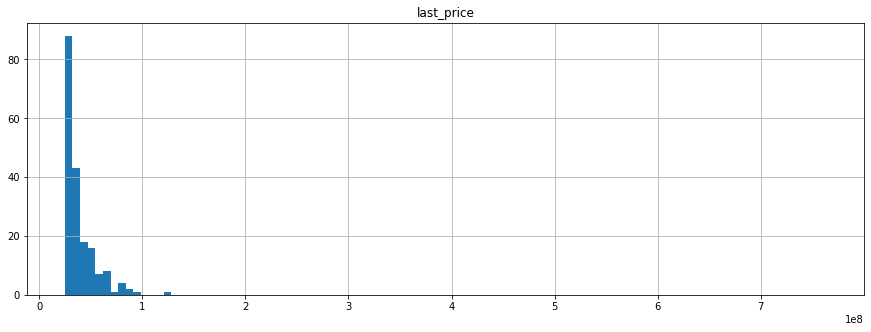

In [13]:
#Проверим на выбросы столбец с ценой
data.boxplot('last_price')
#Есть выбросы, изучим детальнее
#Узнаем минимальное и максимальное значение столбца
print('Минимальная цена:', data['last_price'].min(), 'Максимальная цена:', data['last_price'].max())
#Используем диаграммы, чтобы выделить выбросы
data.sort_values('last_price').hist('last_price', bins=100, figsize=(15,5), range=(0,599999))
data.sort_values('last_price').hist('last_price', bins=100, figsize=(15,5), range=(600000,25000000))
data.sort_values('last_price').hist('last_price', bins=100, figsize=(15,5), range=(25000001,763000000))
#При помощи диаграмм, получилось выявить зоны аномально низких и высоких значений
#Так как количество их невелико, считаю, что правильнее исключить их из выборки, для более объективного анализа
data = data.loc[(data['last_price'] >= 600000) & (data['last_price'] <= 25000000)]
#Сброс индексов
data.reset_index(inplace=True, drop=True)

data.info()

После изучения значений, было принято решение исключить из выборки выбивающиеся значения. Для удобства все цены были разделены на три категории, чтобы определить, что можно безболезненно исключить из выборки. В датасете остались значения от 600 000 до 25 000 000.

Расстояния до объектов инфраструктуры

[    0.  6450.  6914. ... 84665. 84853. 84869.]
[    0.   287.   329. ... 65764. 65952. 65968.]


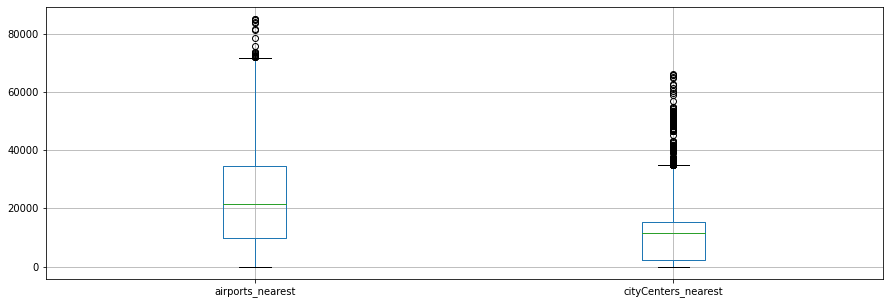

In [14]:
#Это второстепенные значения, проверим, что отсутствуют аномальные значения, при помощи boxplot
infra = data[['airports_nearest', 'cityCenters_nearest']]
infra.boxplot(figsize=(15,5))

#И закрепим цифрами минимальных и максимальных значений.
print(data['airports_nearest'].sort_values().unique())
print(data['cityCenters_nearest'].sort_values().unique())

Расстояние есть расстояние, не вижу ничего, что могло бы быть здесь нереалистичным. Максимальные значения в районе 66-85 км, имеет место быть. Минимальное значение 0, но так мы обозначили все пропуски. Оставим как есть.

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

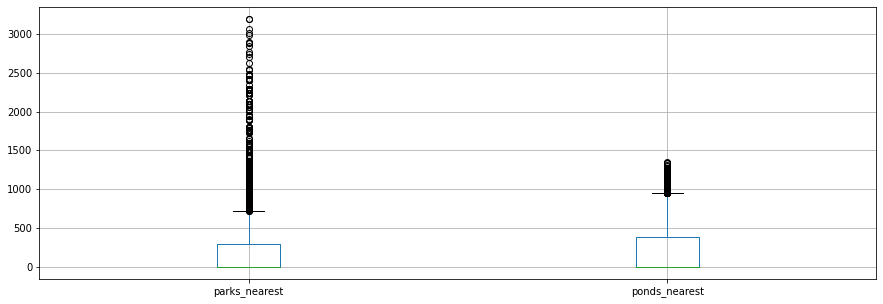

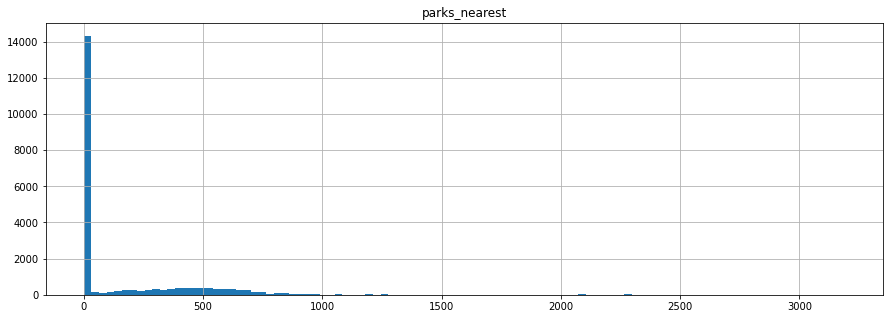

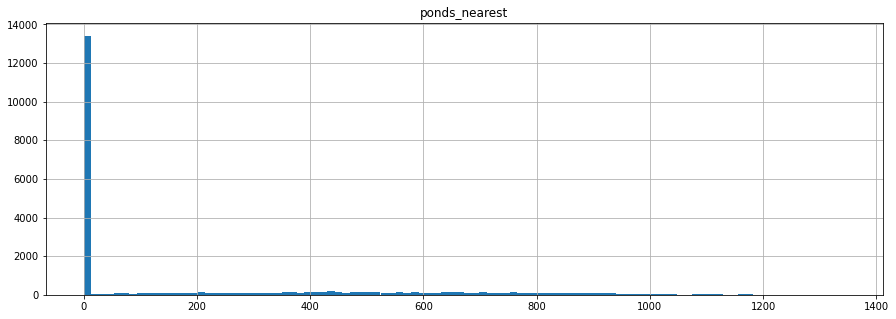

In [15]:
#Это второстепенные значения, проверим, что отсутствуют аномальные значения, при помощи boxplot
infra = data[['parks_nearest', 'ponds_nearest']]
infra.boxplot(figsize=(15,5))

#Изучим подробнее
data.sort_values('parks_nearest').hist('parks_nearest', bins=100, figsize=(15,5))
data.sort_values('ponds_nearest').hist('ponds_nearest', bins=100, figsize=(15,5))

#### Столбец количество дней продажи

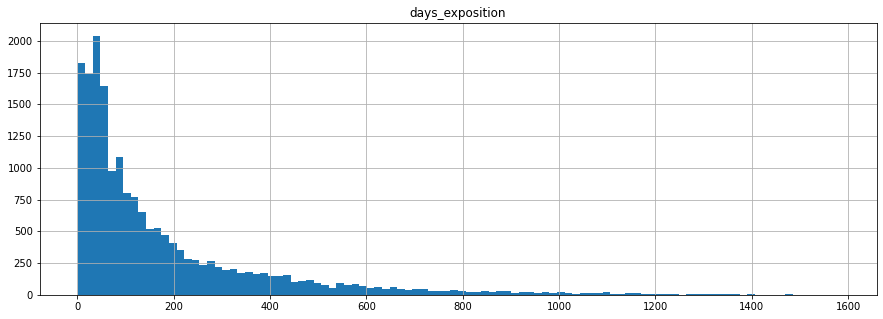

In [16]:
data.sort_values('days_exposition').hist('days_exposition', bins=100, figsize=(15,5))

#Значения больше 800 дней можно считать аномальными.
index_days_exposition = data.query('days_exposition > 800').index
data.drop(index_days_exposition, inplace=True, axis=0)

Да, у нас есть аномалия, а именно 0, но таким образом мы обозначили пропуски, оставим как есть.
А вот срок продажи более 800 дней выглядит не нормально, исключим из выборки значения от 800 дней и более.

### Посчитайте и добавьте в таблицу новые столбцы

Поставлена задача рассчитать и добавить в таблицу новые столбцы:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [17]:
# Расчет значений для столбца "Цена за квадратный метр"
data['price_per_metr'] = (data['last_price'] / data ['total_area']).astype(int)

# Извлечем данные из столбца "Первый день публикации" и заполним новые столбцы
# День
data['day'] = data['first_day_exposition'].dt.weekday
# Месяц
data['month'] = data['first_day_exposition'].dt.month
# Год
data['year'] = data['first_day_exposition'].dt.year

# Группируем этажи исходя из поставленной задачи
# Создадим функцию которая заполнит столбец "Группа этажей" по заданным условиям
# Добавил в функцию поправку на крайние значения "отрицательные и меньше нуля"
def flour_group(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] <=0:
        return 'Неккоректное значение'
    else:
        return 'Другой'
data['floor_group'] = data.apply(flour_group, axis=1)

# Заполним столбец "Расстояние до центра в км" (делим на 1000 значения в метрах, оцелочисливаем)
data['city_centre_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype(int)

#Проверка показала, что отрицательные и нулевые значения отсутствуют
#data.floor_group.value_counts().to_frame()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,floor_group,city_centre_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,Другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0,0.0,81.0,82920,1,12,2018,Первый,18
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,Другой,13
3,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0,0.0,55.0,95065,0,9,2018,Другой,0
4,5,7915000,71.6,2019-04-18,2,2.75,24,32.7,22,False,...,0.0,0,0.0,NaN,110544,3,4,2019,Другой,11


Были добавлены все необходимые для дальнейшего исследования стобцы.
* Цена за квадратный метр расчитана из имеющихся данных путем деления цены на общую площадь.
* Столбцы указывающие на день, месяц и год, созданы из имеющихся данных, при помощи метода .dt
* Группы этажей "первый", "последний" и "другой" заполнены по исходным данным при помощи функции по условию.
* Модифицированный столбец "Расстояние до центра в км" создан из исходных данных, путем перевода в нужную величину и округления до целого.

### Проведите исследовательский анализ данных

#### Анализ базовых параметров

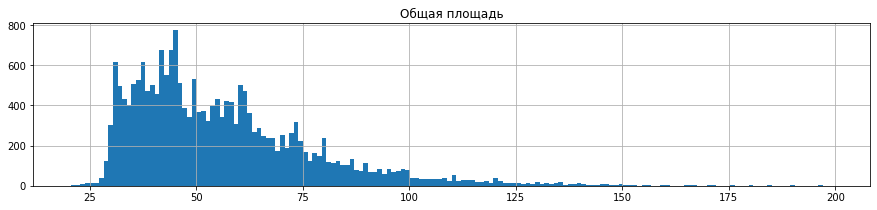

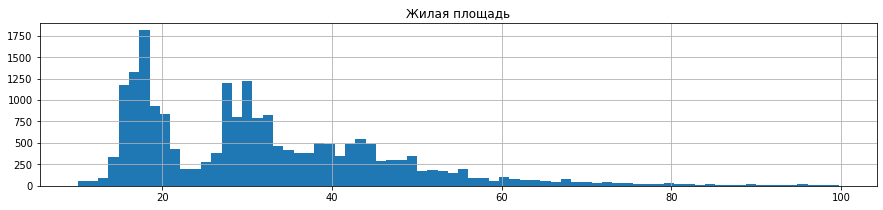

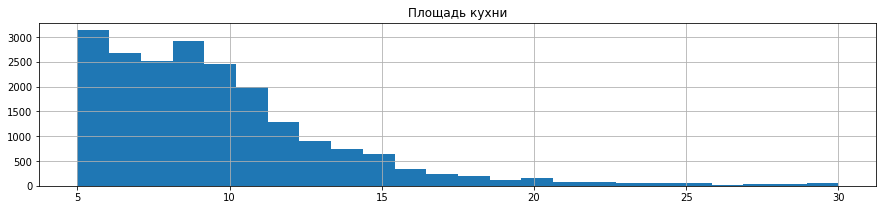

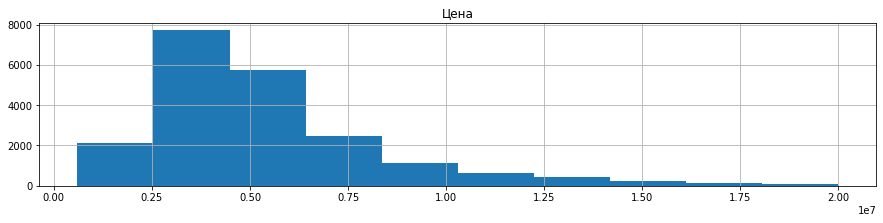

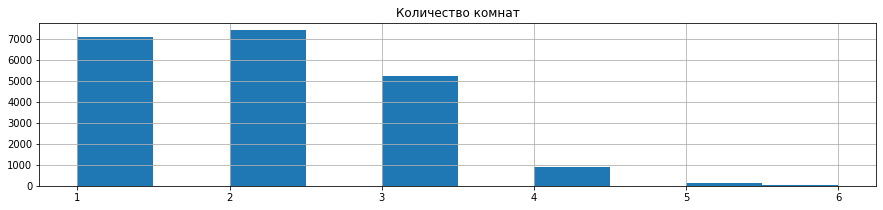

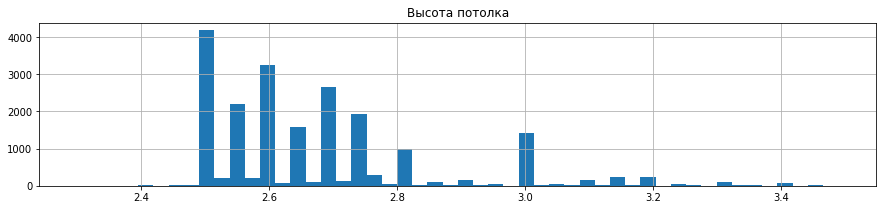

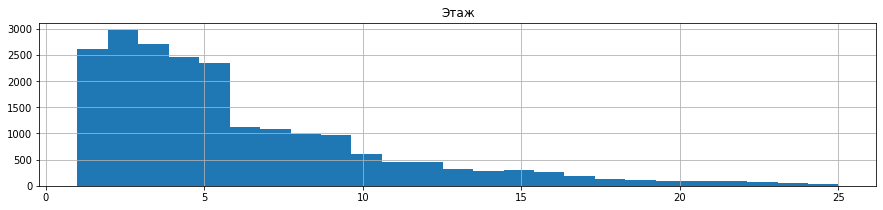

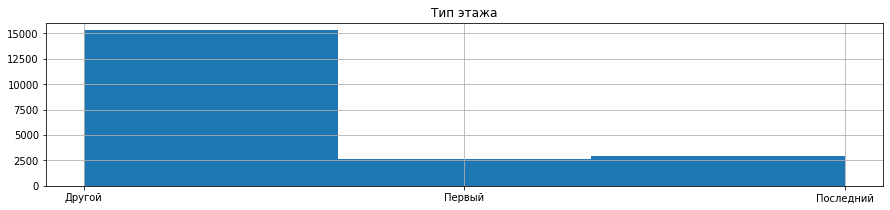

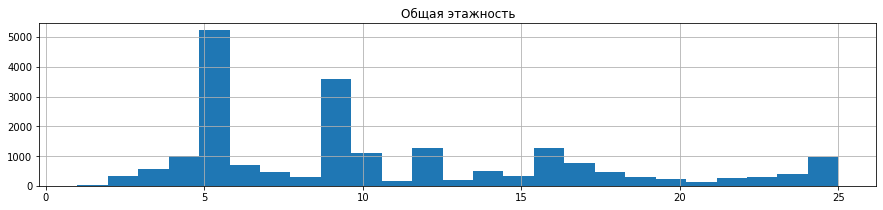

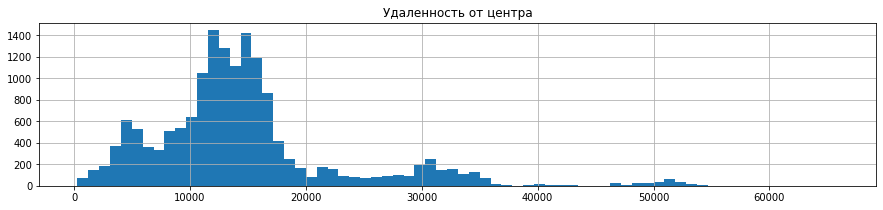

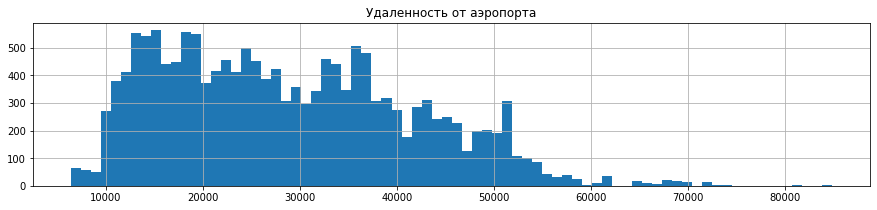

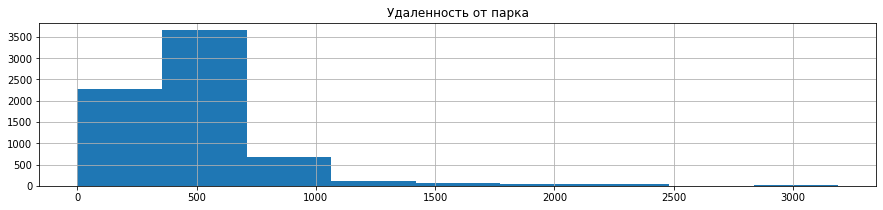

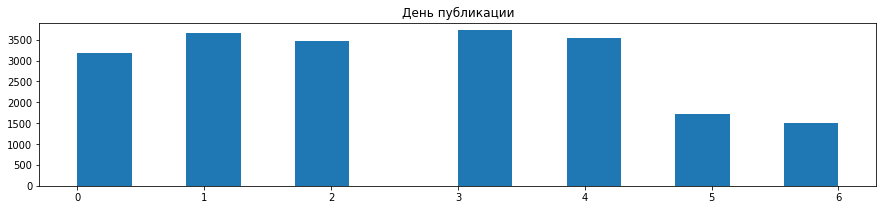

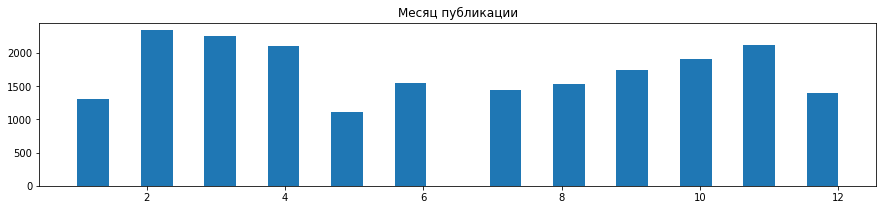

In [18]:
# Гистограмма для Общей площади, выборка с ценами до 200 м2, чтобы график был наглядным
data.query('total_area < 200')['total_area'].hist(figsize=(15,3), bins = len(pd.unique(data['total_area']))//10).set_title('Общая площадь')
plt.show()
# Гистограмма для Жилой площади, количество корзин для графиков с площадями будем делать в едином масштабе
data.query('living_area < 100')['living_area'].hist(figsize=(15,3), bins= len(pd.unique(data['living_area']))//10).set_title('Жилая площадь')
plt.show()
# Гистограмма для Площади кухни
data.query('kitchen_area < 40')['kitchen_area'].hist(figsize=(15,3), bins= len(pd.unique(data['kitchen_area']))//10).set_title('Площадь кухни')
plt.show()
# Гистограмма для Цены объекта, ограничимся значениями до 20кк, чтобы график был наглядным
data.query('last_price < 20000000')['last_price'].hist(figsize=(15,3), bins= 10).set_title('Цена')
plt.show()
#Количество комнат
data['rooms'].hist(figsize=(15,3), bins = 10).set_title('Количество комнат')
plt.show()
# Высота потолков
data['ceiling_height'].hist(figsize=(15,3), bins = 50).set_title('Высота потолка')
plt.show()
# Этаж квартиры
data['floor'].hist(figsize=(15,3), bins = len(pd.unique(data['floor']))).set_title('Этаж')
plt.show()
# Тип этажа квартиры
data['floor_group'].hist(figsize=(15,3), bins = len(pd.unique(data['floor_group']))).set_title('Тип этажа')
plt.show()
# Общее количество этажей в квартире
data['floors_total'].hist(figsize=(15,3), bins = len(pd.unique(data['floors_total']))).set_title('Общая этажность')
plt.show()
# Расстояние до центра города, исключим из выборки пропуски, в данном случае они не информативны
data.query('cityCenters_nearest > 0')['cityCenters_nearest'].hist(figsize=(15,3), bins = len(pd.unique(data['cityCenters_nearest']))//100).set_title('Удаленность от центра')
plt.show()
# Расстояние до аэропорта, исключим из выборки пропуски, в данном случае они не информативны
data.query('airports_nearest > 0')['airports_nearest'].hist(figsize=(15,3), bins = len(pd.unique(data['airports_nearest']))//100).set_title('Удаленность от аэропорта')
plt.show()
# Расстояние до парка, исключим из выборки пропуски, в данном случае они не информативны
data.query('parks_nearest > 0')['parks_nearest'].hist(figsize=(15,3), bins = len(pd.unique(data['parks_nearest']))//100).set_title('Удаленность от парка')
plt.show()
# Дни продажи, имеем четкое количество дней, уберем сетку и сделаем расстояние между столбцами
data['day'].hist(figsize=(15,3), bins = 14, grid = False).set_title('День публикации')
plt.show()
# Месяцы продажи, имеем четкое количество месяцев, уберем сетку и сделаем расстояние между столбцами
data['month'].hist(figsize=(15,3), bins = 24, grid = False).set_title('Месяц публикации')
plt.show()

Благодаря построенным гистограммам, можно детально изучить базовые параметры и сделать определенные выводы о предложенной на площадке недвижимости.

1. Общая площадь 

Исходя из графика можно увидеть вполне предсказуемую картину: больше всего предложений с общей площадью от 25 до 50 м2, очевидно, что это квартиры с одной или двумя комнатами, самые распространенные. Уже значительно меньше предложений от 50 до 75 м2, это двух и трех, возможно четырех комнатные квартиры, более дорогой сегмент. Ну и от 75 до 100 м2, квартиры с 4 и более комнатами, их меньше чем "двушек", но тоже достаточно. Все что меньше 25 и больше 100 м2, можно считать за уникальные предложения.

2. Жилая площадь

В целом картина аналогичная, ведь жилая площадь имеет прямую связь с общей площадью.
Можно выделить наибольшее число предложений приблизительно от 17 до 50 м2.

3. Площадь кухни

И тут есть прямая зависимость от общей площади, хотя планировка квартир, конечно  может отличаться, однако в глобальном плане, все стандартно, больше всего предложений от 5 до 15 м2.

4. Цена продажи

Вполне реалистичные значения, больше всего предложений находятся в срезе от 2 000 000 до 7 500 000, что вполне соответствует реальности, учитывая, что в выборке есть как крупные города, так и небольшие населенные пункты.

5. Количество комнат

В большей части предложений от 1 до 3 комнат, 4 и более комнат встречаются гораздо реже.

6. Высота потолка

Как я и предполагал, большая часть предложений имеет высоту потолков 2,5 - 2,8м, так же есть очевидный пик помещений с 3 метровыми потолками, вполне может быть. Остальные значения можно считать редкими, их количество невелико.

7. Этаж

В основном предложены помещения до 5 этажа включительно, значительно меньше предложений до 10 этажа, ну и далее по нисходящей. Вполне реалистичо, ведь 5 этажей есть почти в любом доме, а предложений в высотках значительно меньше, а на верхних этажах еще меньше.

8. Тип этажа

Меньше всего предложений на первом и последнем этаже, больше всего на других. Вполне очевидный расклад, просто по соотношению количества этажей в принципе.

9. Общее количество этажей

На графике четко видно два пика это 5 этаж и 9 этаж, именно этих домов существует больше всего. Предложения по прочим этажностям тоже есть, но, конечно значительно меньше.

10. Удаленность от центра

Большее количество предложений расположилось на удаленности от центра до 20км, дальше от центра предложений уже значительно меньше.

11. Удаленность от аэропорта

Удаленность от аэропорта же показывает больший разброс, предложения почти равномерно распределились в диапазоне от 5 до 50 км. Вполне ожидаемо для нашей выборки, аэропорты чаще всего расположены на окраине города.

12. Удаленность от парка

С парками проблем нет, большая часть предложений расположена на расстоянии менее километра до ближайшего парка.

13. День публикации

Чаще всего объявления публикуют в будни, почти равномерно в любой день. Меньше в выходные. Вероятнее всего в основном продажей занимаются риэлторы и соответственно делают публикации в рабочее время. 

14. Месяц публикации

Тут на графике четко прослеживается сезонность рынка. Количество предложений падает летом и в Новогодние праздники, и растет в рабочие месяца. Вполне закономерно.

В итоге можно сказать, что все значения вполне предсказуемы и выглядят очень реалистично. Это говорит, что выборка корректна и наша предобработка сделала ее еще более наглядной и логичной.

#### Сроки продажи недвижимости

Медианное время продажи: 91 

Среднее время продажи: 155 



count    18023.000000
mean       154.854519
std        164.159406
min          1.000000
25%         44.000000
50%         91.000000
75%        210.000000
max        800.000000
Name: days_exposition, dtype: float64

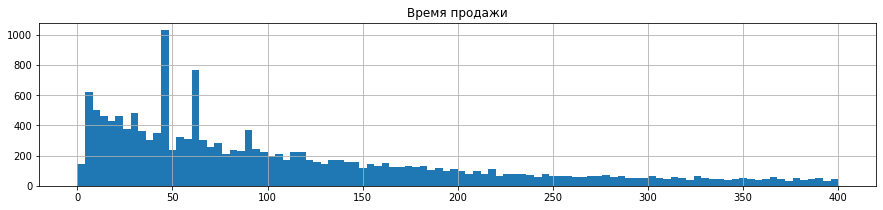

In [19]:
# Посчитаем среднее и медианное время продажи недвижимости в днях, отбросим значения с маркером и округлим.
print('Медианное время продажи:', round(data.query('days_exposition > 0')['days_exposition'].median()),'\n')
print('Среднее время продажи:', round(data.query('days_exposition > 0')['days_exposition'].mean()),'\n')
# Гистограма времени продажи, отделим редкие значения, отбросим маркер, пропишем заголовок
data.query('days_exposition > 0')['days_exposition'].hist(bins=100, range = (0, 400), figsize=(15,3)).set_title('Время продажи')
# Посмотрим значения срока продажи
data.query('days_exposition > 0')['days_exposition'].describe()

Исходя из графика можно увидеть что большая часть недвижимости продавалось менее, чем за 200 дней. Есть четко выраженный пик в районе до 50 дней. Средний срок продажи 181 день, медианный 96.
Можно сделать вывод, что быстрая продажа это в течении одного-двух месяцев, в среднем на продажу уйдет три-четыре месяца, а все, что дольше это уже медленная продажа, если недвижимость продается дольше 8 месяцев, значит это либо очень спецефическое предложение, либо пора снижать цену.

#### Влияние базовых параметров на общую стоимость

<AxesSubplot:xlabel='day'>

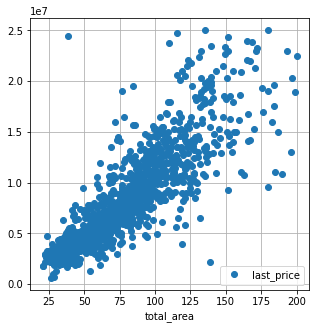

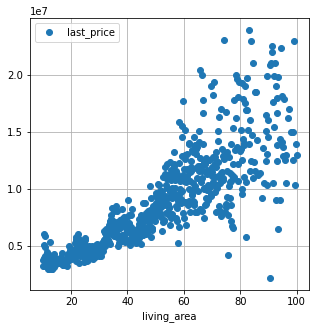

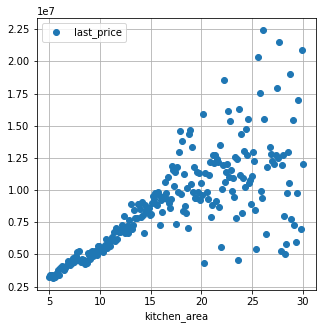

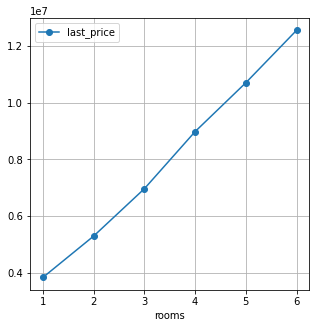

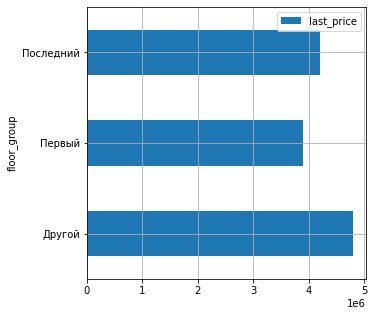

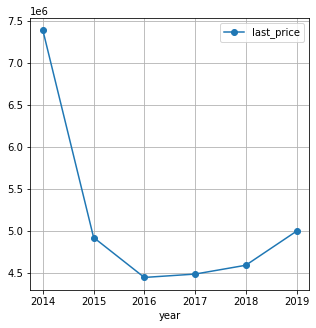

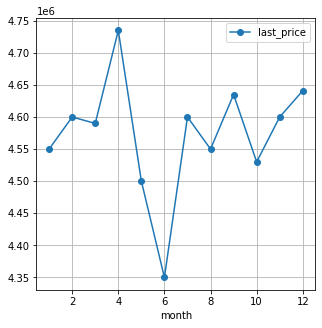

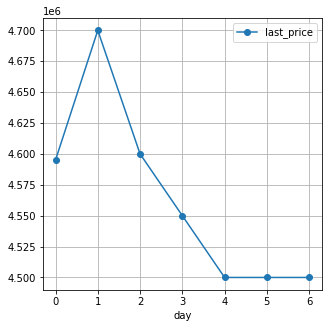

In [20]:
#Выясним кореляцию стоимости к базовым параметрам
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='floor_group', values='last_price', aggfunc='median').plot(kind = 'barh', grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='day', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Исходя из составленных графиков, можно сделать некоторые выводы относительно зависимости стоимости квартиры от базовых параметров.

1. Общая площадь

Чем больше блощадь, тем выше стоимость помещения, прямая зависимость.

2. Жилая площадь

Обычно в объявлениях смотрят на общую площадь и на непосредственно жилую площадь смотрят реже при покупке, однако она на прямую зависит от общей площади, формально можно признать, что в целом зависимость цены от жилой площади тоже прямая.

3. Площадь кухни

На графике четко видно прямую зависимость цены от площади кухни, это наверное второй по существенности из базовых параметров при выборе квартиры.

4. Количество комнат

Количество комнат так же напрямую влияет на стоимость квартиры, видна небольшая просадка в многокомнатных квартирах, это может быть связано с демпингом на труднопродаваемое жилье, что в целом не меняет картины.

5. Этаж

Самые недорогие квартиры находятся на первом этаже, а вот цены на любой другой этаж уже значительно выше, в то время как цены на последний этаж чуть ниже, чем на любой другой кроме первого.

6. Год публикации

2014 год мы не будем брать в расчет, поскольку значений в этом году мало, можем налюдать стабильный рост цен на недвижимость начиная с 2016 года и по сегодняшний день.

7. Месяц публикации

Четко прослеживается сезонность рынка. Летом самые низкие цены. Весной самые высокие. В остальные месяцы цены варьируются от средних до выше средних попеременно.

8. День публикации

Самые дорогие предложения появляются по вторникам, после чего в среднем цена начинает опускаться и достигает минимума к четвергу держится на низком уровне еще немного проседает в воскресенье, а с понедельника начинает расти.

#### Сравнение стоимости за м2 в 10 городах с наибольним количеством предложений

,price_per_metr
locality_name,
Санкт-Петербург,108783
Пушкин,101739
деревня Кудрово,91904
поселок Парголово,85974
поселок Мурино,84846
поселок Шушары,78203
Колпино,75167
Гатчина,68959
Всеволожск,68665


<AxesSubplot:ylabel='locality_name'>

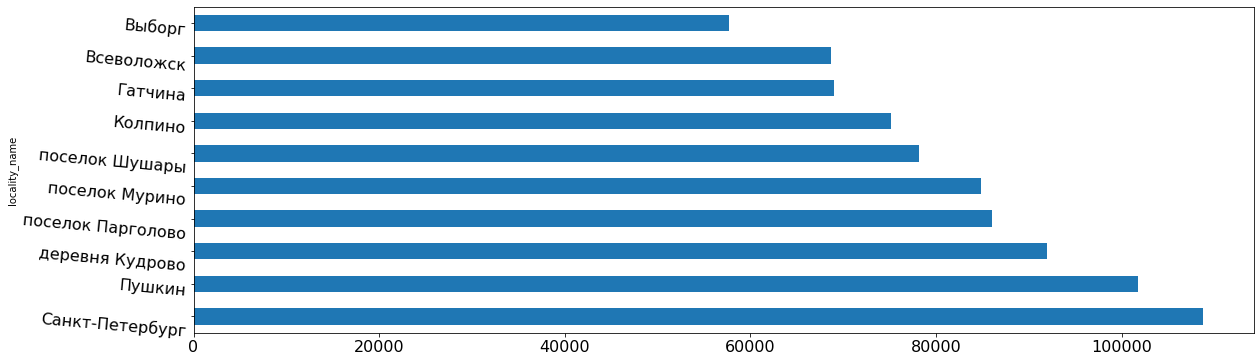

In [21]:
#Запишем в переменную топ 10 городов, где больше всего предложений
top = data['locality_name'].value_counts().head(10)
display(
#Выводим список городов с сортировкой по убыванию, по цене за квадратный метр жилья  
      data.query('locality_name in (@top.index)')
    .pivot_table(values='price_per_metr', index='locality_name')
    .sort_values(by='price_per_metr', ascending=False)
    .astype(int)
)

(
#Выводим список городов с сортировкой по убыванию, по цене за квадратный метр жилья  
      data.query('locality_name in (@top.index)')
    .pivot_table(values='price_per_metr', index='locality_name')
    .sort_values(by='price_per_metr', ascending=False)
    .astype(int).plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
)


В выборке из 10 населенных пунктов, где больше всего предложений, цена за м2 варьируется от 58237р (Выборг) до 112298р(Санкт-Петербург). Самые высокие цены в Санкт-Петербурге и далее уменьшаются по мере удаления от города.

#### Средняя цена каждого км до центра города в Санкт-Петербурге

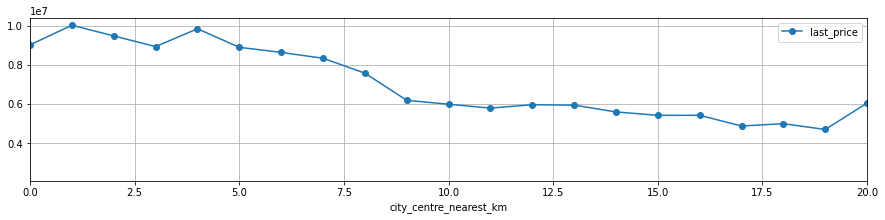

In [22]:
# Расчитываем общую цену недвижимости на каждый километр в Санкт-Петербурге
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centre_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,20), figsize=(15, 3))
)
plt.show()

Исходя из полученных данных, можно сделать вывод, что начиная с расстояния 9 км до центра города, цена на недвижимость начинает существенно расти.

### Общий вывод

* Предобработка данных
В датафрейме предобработке подверглись многие данные.
1. Удалены некорректные, неинформативные и аномально высокие и низкие значения.
2. Значения с пропусками были заменены на средние и медианные, где это оправдано. Там где это возможно пропуски были заменены согласно логике. Там где нет возможности произвести замену, а удаление не целесообразно, были установлены маркеры, которые были учтены в дальнейшем исследовании.
3. Устранены дубликаты и приведены к единому стандарту текстовые значения.
4. Типы данных были приведены в соответствующий формат, согласно тем значениям, которые в них хранятся.
5. В датафрейм были добавлены рассчетные значения для проведения исследования.

* Исследование данных
1. При помощи гистограмм был произведен анализ данных, который показал, что значения всех базовых параметров имеют реалистичные значения и четко прослеживаются особенности рынка недвижимости (например сезонность продаж и преоблодание колчества 5 и 9 этажных домов на рынке)
2. * Определена прямая зависимость цены, от площади (общей, жилой и кухонной) и количества комнат на цену.
   * Жилье на первом этаже стоит дешевле, чем на любом другом.
   * Выявлена зависимость цены от месяца, летом, в середине осени и весны и к Новогодним праздникам, цены опускаются, в остальное время растут.
3. Скорость продажи квартир в среднем составляет 181 день, в то время, как медианное 96, соответственно можно прийти к выводу, что до 3 месяцев это быстрая продажа, до полугода это среднее время продажи, более полугода медленная продажа, год и более, аномально долгое время продажи.
4. Цена недвижимости напрямую зависит от того в какой локации находится, чем ближе к Санкт-Петербургу, тем дороже. Кроме того, эта тенденция сохраняется и в городе, чем ближе к центру, тем дороже жилье.
